In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import astropy.units as u

from asteria import config, source
from asteria.neutrino import Flavor
from asteria.oscillation import SimpleMixing

mpl.rc('font', size=16)

In [2]:
# HACK! Remove.
import os
os.environ['ASTERIA'] = '/Users/sybenzvi/Documents/IceCube/USSR/github'

conf = config.load_config('../../data/config/test.yaml')
ccsn = source.initialize(conf)

In [3]:
mix = SimpleMixing(33.8)

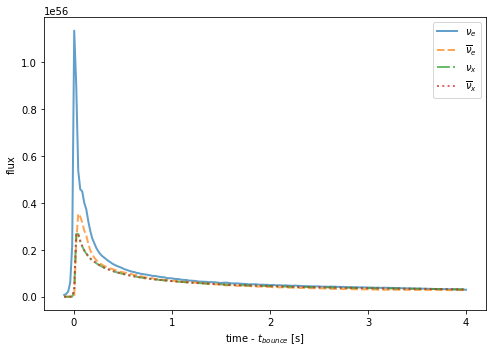

In [4]:
fig, ax = plt.subplots(1,1, figsize=(7,5))

t = np.linspace(-0.1, 4, 201) * u.s
for ls, flavor in zip(["-", "--", "-.", ":"], Flavor):
    flux = ccsn.get_flux(t, flavor)
    
    ax.plot(t, flux, ls, lw=2, label=flavor.to_tex(), alpha=0.7)
# plt.yscale('log')
# plt.ylim(3e51, 5e53)
ax.set(xlabel='time - $t_{bounce}$ [s]',
       ylabel='flux')
ax.legend()
fig.tight_layout()

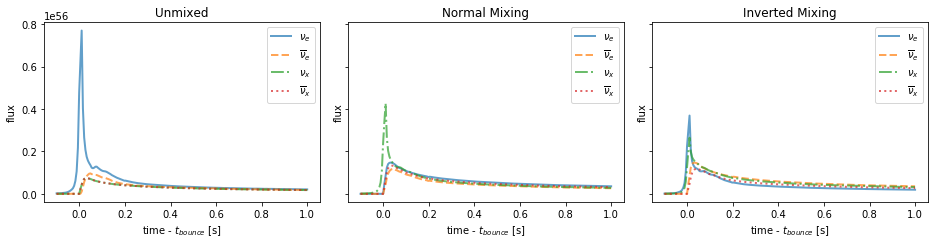

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(13,3.5), sharex=True, sharey=True)

ax1, ax2, ax3 = axes
t = np.linspace(-0.1, 1, 201) * u.s

#UNMIXED

for ls, flavor in zip(["-", "--", "-.", ":"], Flavor):
    flux = ccsn.get_flux(t, flavor)
    
    ax1.plot(t, flux, ls, lw=2, label=flavor.to_tex(), alpha=0.7)
    ax1.set_title("Unmixed")
# plt.yscale('log')
# plt.ylim(3e51, 5e53)
ax1.set(xlabel='time - $t_{bounce}$ [s]',
        ylabel='flux')
ax1.legend()

#NORMAL MIXING

nu_list1 = []
i = 0
for flavor in Flavor:
    flux = ccsn.get_flux(t, flavor)
    nu_list1.append(flux)
    
nu_new1 = mix.normal_mixing(nu_list1)

# nu_e1 = [a + b for a, b in zip(nu_list1[2], nu_list1[3])]  
# nu_x1 = [(a + b + c)/2 for a, b, c in zip(nu_list1[0], nu_list1[2], nu_list1[3])]
# nu_e_bar1 = [a*c2t12 + (b+c)*s2t12 for a, b, c in zip(nu_list1[1], nu_list1[2], nu_list1[3])]
# nu_x_bar1 = [((1.0-c2t12)*a + (1.0+c2t12)*(b+c))/2 for a, b, c in zip(nu_list1[1], nu_list1[2], nu_list1[3])]
# nu_new1 = [nu_e1, nu_e_bar1, nu_x1, nu_x_bar1]

for ls, i, flavor in zip(["-", "--", "-.", ":"], range(len(nu_new1)), Flavor):
    new_flux1 = nu_new1[i]
    ax2.plot(t, new_flux1, ls, lw=2, alpha=0.7, label=flavor.to_tex())
    ax2.set_title(label="Normal Mixing")

ax2.set(xlabel='time - $t_{bounce}$ [s]',
        ylabel='flux')

ax2.legend()

#INVERTED MIXING

nu_list2 = []
i = 0
for flavor in Flavor:
    flux = ccsn.get_flux(t, flavor)
    nu_list2.append(flux)
    
nu_new2 = mix.inverted_mixing(nu_list1)

# nu_e2 = [a*s2t12 + b*c2t12 for a, b in zip(nu_list2[0], nu_list2[1])]   
# nu_x2 = [((1.0-s2t12)*a + (1.0+s2t12)*(b+c))/2 for a, b, c in zip(nu_list2[0], nu_list2[2], nu_list2[3])] 
# nu_e_bar2 = [a + b for a, b in zip(nu_list2[2], nu_list2[3])]
# nu_x_bar2 = [(a + b + c)/2 for a, b, c in zip(nu_list2[1], nu_list2[2], nu_list2[3])]
# nu_new2 = [nu_e2, nu_e_bar2, nu_x2, nu_x_bar2]

for ls, i, flavor in zip(["-", "--", "-.", ":"], range(len(nu_new2)), Flavor):
    new_flux2 = nu_new2[i]
    ax3.plot(t, new_flux2, ls, lw=2, alpha=0.7, label=flavor.to_tex())
    ax3.set_title(label="Inverted Mixing")

ax3.set(xlabel='time - $t_{bounce}$ [s]',
        ylabel='flux')
ax3.legend()


fig.tight_layout();